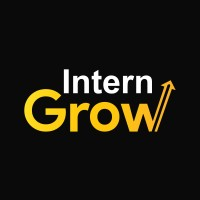

# Task 3 - Develop A Neural Network That Can Read Handwriting

## Name - Subhraneel Saha

## Loading - "MNIST Data Set"

## Containing Training samples = 60,000 , Testing Samples = 10,000

#### TensorFlow already contain MNIST data set which can be loaded using Keras

In [1]:
import tensorflow as tf # pip install tensorflow

In [2]:
mnist = tf.keras.datasets.mnist ## this is basically handwritten characters based on 28x28 sized images of 0 to 9

#### Dividing into train and Test datasets

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
#unpacking the dataset into train and test datasets
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

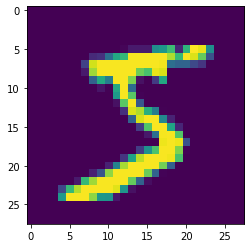

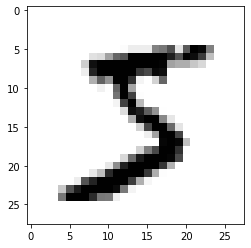

In [6]:
##checking the graph, how the data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
## in order to execute the graph it is unknown whether it is color or binary
## image so in order to plot it the configuration has been changed.
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

#### Checking the values of each pixel

**Before Normalization**

In [7]:
print (x_train[0]) ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#### As images are in Gray level (1 channel ==> 0 to 255), not Colored(RGB)

#### Normalising the data | Pre-Processing Step

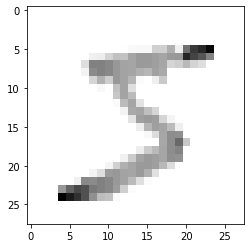

In [8]:
## it might have been noticed that, its gray image and all values varies from 0 to 255
## in orser to normalize it
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [9]:
print(x_train[0]) ## all values are normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print (y_train[0]) ## checking the labels inside our network

5


#### Resizing image to make it suitable for apply Convolution operation

In [11]:
import numpy as np # pip install numpy 
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1) ## increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) ## increasing one dimension for kernel operation
print ("Training Samples dimension",x_trainr.shape)
print ("Testing Sapmles dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Sapmles dimension (10000, 28, 28, 1)


### Creating a Deep Neural Network

#### Training on 60000 samples of MNIST handwritten dataset

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#### Creating the Sequential Model

In [13]:
## Creating a neural network
model = Sequential()

### First Convolution Layer 0 1 2 3 (60000,28,28,1) 28-3+1 = 26*26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ### only for the first convolution layer to mention input layer size
model.add(Activation("relu"))## activation function to make it non-linear, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2)))## MaxPooling single maximum value of 2x2

### Second Convolution Layer
model.add(Conv2D(64, (3,3)))## Second Convolution Layer
model.add(Activation("relu"))## activation function
model.add(MaxPooling2D(pool_size=(2,2)))## MaxPooling

### Third Convolution Layer
model.add(Conv2D(64, (3,3)))## Third Convolution Layer 24*24
model.add(Activation("relu"))## activation function
model.add(MaxPooling2D(pool_size=(2,2)))## MaxPooling

### Fully Connected Layer # 1 20x20 = 400
model.add (Flatten()) ### before using fully connected layer, need to be flatten so that 2D to 1D
model.add (Dense(64)) 
model.add(Activation("relu"))

### Fully Connected Layer # 2
model.add (Dense(32))
model.add(Activation("relu"))

### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10))## this last dense must be equal to 10
model.add(Activation('softmax'))###activation function is changed to Softmax (Class probabilities)
## binary classification, one neuron in Dense Layer, sigmoid

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=['accuracy'])

In [17]:
model.fit (x_trainr,y_train,epochs=5, validation_split = 0.3) ## Training the model 

Epoch 1/5
1313/1313 [==============================] - 63s 47ms/step - loss: 0.3285 - accuracy: 0.8961 - val_loss: 0.1437 - val_accuracy: 0.9551
Epoch 2/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.1079 - accuracy: 0.9660 - val_loss: 0.1073 - val_accuracy: 0.9679
Epoch 3/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.0748 - accuracy: 0.9770 - val_loss: 0.0761 - val_accuracy: 0.9772
Epoch 4/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.0735 - val_accuracy: 0.9783
Epoch 5/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0762 - val_accuracy: 0.9761


In [18]:
### Evaluating on testing data set MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test Loss on 10,000 test samples",test_loss)
print ("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.0702 - accuracy: 0.9793
Test Loss on 10,000 test samples 0.07024809718132019
Validation Accuracy on 10,000 test samples 0.9793000221252441


In [19]:
# Using simple model
predictions = model.predict([x_testr]) 

In [20]:
print(predictions) ## these predictions are based on one hot encoding so these are only arrays, containing softmax prediction

[[3.5818275e-07 2.3024501e-07 3.2067803e-06 ... 9.9999201e-01
  1.1364204e-08 1.5730415e-06]
 [3.7298021e-06 2.8169185e-05 9.9989569e-01 ... 3.8782680e-05
  1.0022799e-05 2.6560838e-06]
 [8.8646575e-06 9.9970239e-01 8.4607573e-06 ... 2.1281216e-05
  2.0743489e-06 4.8542411e-06]
 ...
 [2.7038138e-10 1.1244628e-07 1.4469381e-10 ... 3.0421695e-08
  9.2940375e-08 4.2417480e-07]
 [5.2992812e-07 7.3024653e-10 9.1173326e-11 ... 2.3622235e-10
  5.4631200e-05 8.7662318e-07]
 [1.0762632e-05 2.7905239e-08 4.5831237e-07 ... 7.1828786e-08
  8.5370203e-07 1.5782048e-06]]


In [21]:
#for converting the predictions from one hot encoding, we need to use numpy
print(np.argmax(predictions[1])) ### argmax will return the maximum value index and find the value of it

2


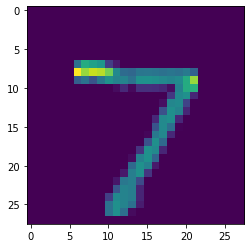

In [22]:
### Checking wheather the answer is true or not
plt.imshow(x_test[0])

In [23]:
#for converting the predictions from one hot encoding, we need to use numpy
print(np.argmax(predictions[128])) ### argmax will return the maximum value index and find the value of it

8


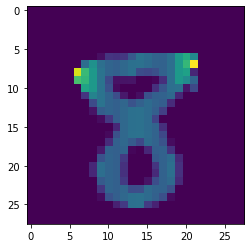

In [24]:
### Checking wheather the answer is true or not
plt.imshow(x_test[128])

#### Detecting the handwritten digits manually using computer Vision

In [25]:
import cv2 ## pip install opencv-python

In [26]:
img = cv2.imread('six.jpeg')

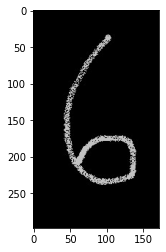

In [27]:
plt.imshow(img)

In [28]:
img.shape

(298, 172, 3)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(298, 172)

In [31]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [32]:
resized.shape

(28, 28)

In [33]:
newimg = tf.keras.utils.normalize (resized, axis = 1) ## 0 to 1 scaling

In [34]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1) # kernel operation of convolution layer

In [35]:
newimg.shape

(1, 28, 28, 1)

In [36]:
predictions = model.predict(newimg)

In [37]:
print(np.argmax(predictions))

6
